In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


In [2]:
my_movies = pd.read_csv("C:\Excelr\my_movies.csv")


In [3]:
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df=pd.get_dummies(my_movies)

In [5]:
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [6]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V..."
1393,0.1,"(Green Mile, LOTR1, V2_LOTR1, V1_Sixth Sense, ..."
1394,0.1,"(Green Mile, Harry Potter1, V2_LOTR1, V1_Sixth..."
1395,0.1,"(Green Mile, Harry Potter1, LOTR1, V2_LOTR1, V..."


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, LOTR2, Sixth Sense, V5_LOTR2)","(Harry Potter1, LOTR1, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Green Mile, LOTR2, V2_LOTR1, V1_Sixth Sense)","(Harry Potter1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Green Mile, Harry Potter1, V2_LOTR1, V5_LOTR2)","(LOTR2, LOTR1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Green Mile, LOTR2, Harry Potter1, V2_LOTR1)","(LOTR1, V5_LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Green Mile, Harry Potter1, V5_LOTR2, V1_Sixth...","(LOTR2, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Green Mile, LOTR2, Harry Potter1, V1_Sixth Se...","(LOTR1, V2_LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Green Mile, LOTR2, Harry Potter1, V5_LOTR2)","(LOTR1, V2_LOTR1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Green Mile, LOTR1, V2_LOTR1, V1_Sixth Sense)","(LOTR2, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Green Mile, LOTR1, V2_LOTR1, V5_LOTR2)","(LOTR2, Harry Potter1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Green Mile, LOTR2, LOTR1, V2_LOTR1)","(Harry Potter1, V5_LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
b=rules.corr()


In [11]:
b

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,0.172060,0.468488,-0.771559,-0.618652,-0.162203,-0.833066
consequent support,0.172060,1.000000,0.468488,0.050134,-0.618652,-0.162203,-0.090439
support,0.468488,0.468488,1.000000,-0.035749,-0.274509,0.608622,0.054357
confidence,-0.771559,0.050134,-0.035749,1.000000,0.651811,0.396345,0.908535
lift,-0.618652,-0.618652,-0.274509,0.651811,1.000000,0.407431,0.859355
leverage,-0.162203,-0.162203,0.608622,0.396345,0.407431,1.000000,0.787119
conviction,-0.833066,-0.090439,0.054357,0.908535,0.859355,0.787119,1.000000


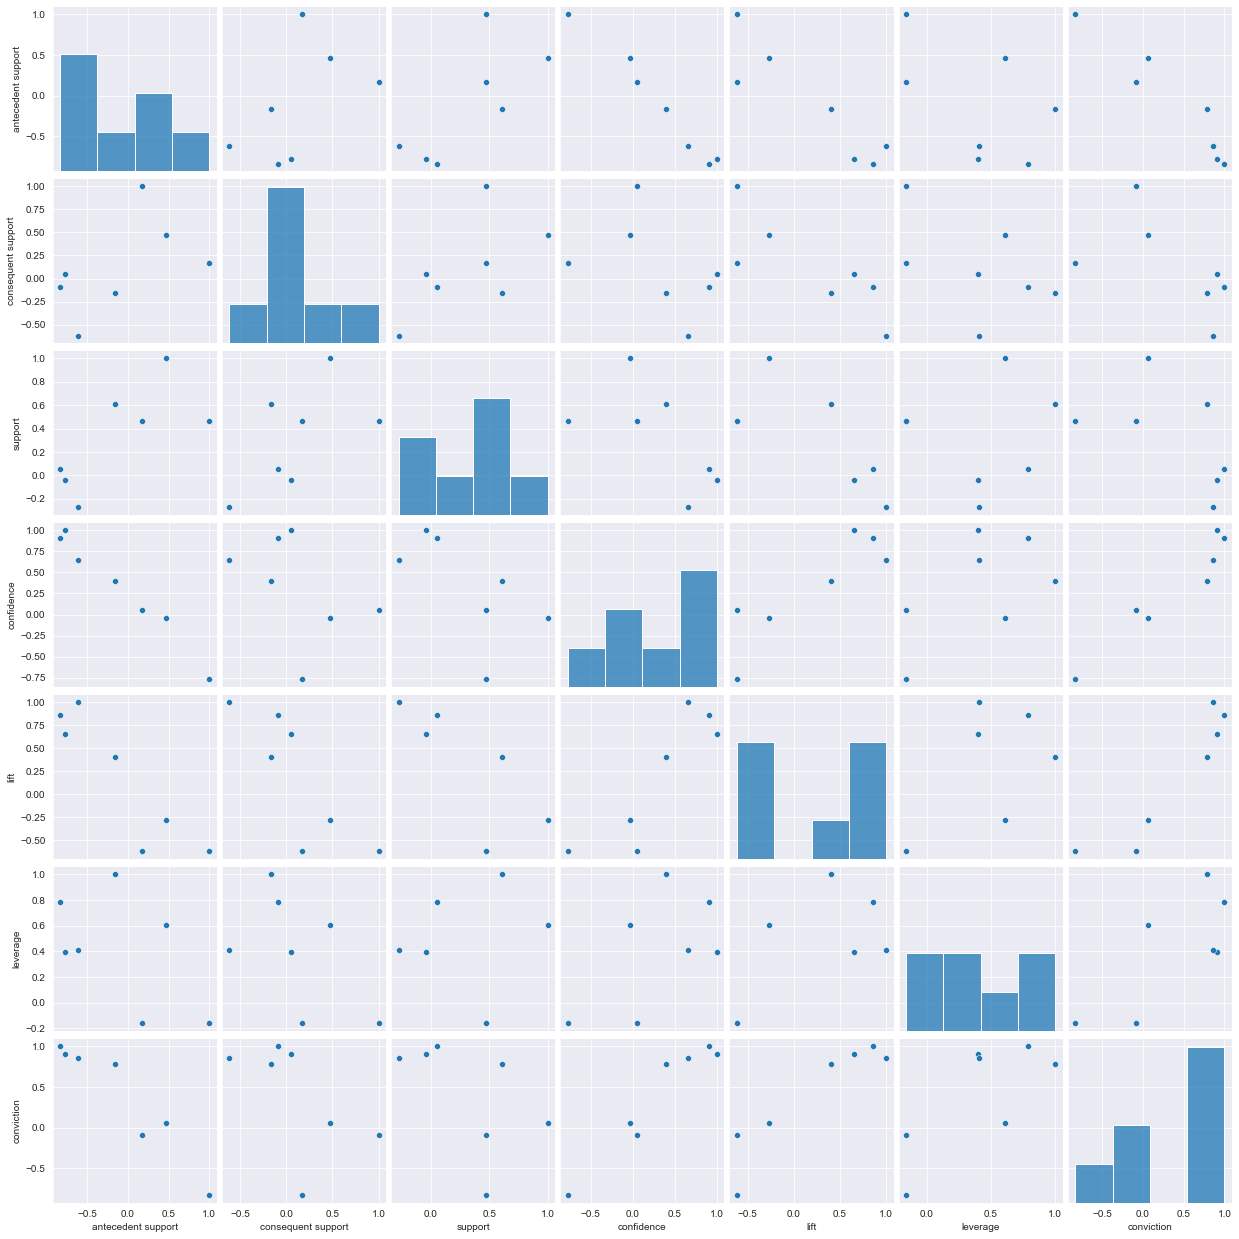

In [12]:
sns.set_style(style="darkgrid")
sns.pairplot(b)


In [13]:
rule1=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rule1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [14]:
rule2=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
rule2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63303,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63304,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63305,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63306,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [15]:
rule3=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
rule3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63240,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63241,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63242,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63243,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [16]:
rule4=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.4)
rule4


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63234,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63235,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [17]:
rule5=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)
rule5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63234,(V5_LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63235,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [18]:
info={'rule':['rule1','rule2','rule3','rule4','rule5'],'counts':[rule1.confidence.count(),rule2.confidence.count(),rule3.confidence.count(),rule4.confidence.count(),rule5.confidence.count()]}


In [19]:
count=pd.DataFrame(info)
count


,rule,counts
0,rule1,64252
1,rule2,63308
2,rule3,63245
3,rule4,63238
4,rule5,63238


<AxesSubplot:xlabel='rule', ylabel='counts'>

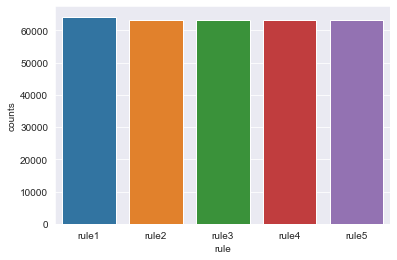

In [20]:
import seaborn as sns
sns.barplot(x='rule',y='counts',data=count)


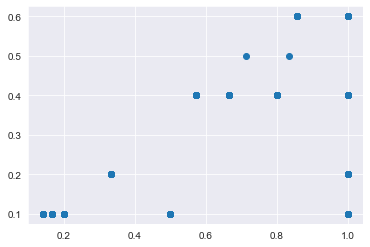

In [21]:
plt.scatter(rule1.confidence,rule1.support)
